# SALUD MENTAL EN EL MUNDO LABORAL

## 0.- Importaciones

En primer lugar, realizamos la importación de las principales librerías y establecemos algunos settings que queremos dejar por defecto para todo el notebook. Iremos añadiendo más módulos a medida que los vayamos necesitando.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Añadimos la carpeta "utils" al path para poder importar nuestros módulos propios
sys.path.append("../utils")

import toolbox_ML as tb
import bootcampviztools as bt

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

---
---

## 1.- Carga y primera visualización

Ahora, leemos el dataframe en el que almacenamos los datos, realizamos una copia que será sobre la que trabajaremos, y echamos un primer vistazo a los datos.

In [2]:
df_original = pd.read_csv("../data_sample/survey.csv")
df_modificable = df_original.copy()

df_original.columns = df_original.columns.str.lower()
df_modificable.columns = df_modificable.columns.str.lower()

In [3]:
display(df_modificable)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
print(df_modificable.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

---
---

## 2.- Tipificación y descripción de variables

Para tener una buena idea inicial vamos a verificar cardinalidad, valores únicos... y a obtener una primera tipificación de las variables:

In [5]:
display(tb.describe_df(df_modificable))

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
DATA_TYPE,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,40.905481,1.429706,0.0,0.0,20.969023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.973789
UNIQUE_VALUES,1246,53,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
CARDIN (%),98.97,4.21,3.89,3.81,3.57,0.16,0.16,0.16,0.32,0.48,0.16,0.16,0.24,0.24,0.24,0.24,0.24,0.4,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.16,12.71


In [6]:
display(tb.tipifica_variables(df_modificable))

,nombre_variable,tipo_sugerido
0,timestamp,Numerica Continua
1,age,Numerica Discreta
2,gender,Numerica Discreta
3,country,Numerica Discreta
4,state,Numerica Discreta
5,self_employed,Binaria
6,family_history,Binaria
7,treatment,Binaria
8,work_interfere,Categorica
9,no_employees,Categorica


Para conocer mejor el caso que estamos tratando y tomar mejores decisiones en la limpieza, tratamiento y posterior selección de features, hagamos una breve descripción de las variables:

| Variable                     | Descripción                                                                |
|------------------------------|----------------------------------------------------------------------------|
| `timestamp`                  | Fecha y hora en que se completó la encuesta.                               |
| `age`                        | Edad del encuestado.                                                       |
| `gender`                     | Género del encuestado.                                                     |
| `country`                    | País de residencia del encuestado.                                         |
| `state`                      | Estado de EE.UU. (si aplica).                                              |
| `self_employed`              | Si el encuestado trabaja por cuenta propia (binaria).                      |
| `family_history`             | Si tiene antecedentes familiares de salud mental (binaria).                |
| `treatment`                  | Si ha recibido tratamiento por salud mental (binaria)(target).             |
| `work_interfere`             | Grado en que los problemas mentales interfieren en el trabajo categorizado en *Never, Rarely,   Sometimes, Often*.                                                                                          |
| `no_employees`               | Número de empleados en la empresa en rangos de [1-5], [6-25], [26-100], [100-500], [500-1000], 1000+                                                                                                       |
| `remote_work`                | Si trabaja de forma remota (binaria).                                      |
| `tech_company`               | Si trabaja en una empresa tecnológica (binaria).                           |
| `benefits`                   | Si la empresa ofrece cobertura para salud mental (*yes, no, don't know*).    |
| `care_options`               | Si hay opciones de cuidado de salud mental fuera del seguro (*yes, no, don't know*).|
| `wellness_program`           | Si hay programas de bienestar en la empresa (*yes, no, don't know*).         |
| `seek_help`                  | Si se sabe cómo y dónde pedir ayuda (*yes, no, don't know*).                 |
| `anonymity`                  | Si el anonimato está garantizado al usar servicios de salud mental (*yes, no, don't know*).|
| `leave`                      | Comodidad al pedir baja médica por salud mental categorizado en *Don't know, Very easy, Somewhat easy, Somewhat difficult, Very difficult.*                                                          |
| `mental_health_consequence`  | Consecuencias percibidas por problemas mentales en el trabajo (*yes, no, maybe*).|
| `phys_health_consequence`    | Consecuencias percibidas por problemas físicos en el trabajo (*yes, no, maybe*).|
| `coworkers`                  | Comodidad al hablar de salud mental con compañeros (*yes, no, some of them*).|
| `supervisor`                 | Comodidad al hablar de salud mental con supervisores (*yes, no, some of them*).|
| `mental_health_interview`    | Si se hablaría de salud mental en una entrevista (*yes, no, maybe*).       |
| `phys_health_interview`      | Si se hablaría de salud física en una entrevista (*yes, no, maybe*).       |
| `mental_vs_physical`         | Si se cree que la empresa da igual importancia a salud mental y física (*yes, no, don't know*).                                                                                                     |
| `obs_consequence`            | Si ha observado consecuencias negativas en otros por problemas mentales (binaria).|
| `comments`                   | Comentarios adicionales abiertos (texto libre).                            |

---
---

## 3.- Tratamiento y limpieza

En primer lugar, teniendo en cuenta que tenemos el dataset original bien guardado, vamos a ir eliminando algunas columnas de la copia con la que vamos a tratar:

1. `timestamp`\
*Fecha y hora en que se completó la encuesta.*\
La eliminamos pues no proporciona información útil para predecir salud mental. Se trata de un simple registro de cuándo se hicieron las preguntas a los encuestados, no nos aporta nada.

2. `state`\
*Estado de EE.UU. (solo para encuestados de EE.UU.)*\
Tiene 41% de valores nulos, porque solo aplica si el país es USA. Además, tiene una cardinalidad bastante alta, 45 valores distintos. En definitiva, genera más complicaciones que valor explicativo, más aún cuando ya tenemos la variable `country`.

3. `comments`\
*Campo abierto de texto libre al final de la encuesta.*\
Para empezar, solo hay 160 respuestas (~13% del total), puesto que es el típico campo opcional en las encuestas para quien quiera dejar comentarios adicionales. Así, es texto sin estructurar, requeriría un tratamiento muy complicado para sacar algo en claro de aquí, lo cual es mucho trabajo para muy poca muestra. En definitiva, no es viable para el análisis cuantitativo que queremos hacer en ese proyecto, así que eliminándola no perdemos poder predictivo.

In [7]:
df_modificable.drop(columns=["timestamp", "state", "comments"], inplace=True)

Ahora vamos a empezar a limpiar y tratar variables. En primer lugar, al echar un vistazo a `age`, vemos que hay algún valor que es claramente un error o que es incompatible. Así, como son tan pocos estos valores equivocados, y para no imputar nada artificialmente, vamos a quedarnos con las filas cuyas edades están en un rango coherente.

In [8]:
df_modificable = df_modificable[(df_modificable["age"] >= 16) & (df_modificable["age"] <= 80)]

En cuanto a `country`, si observamos sus valores únicos, la muestra está repartida casi en su totalidad entre 10 países que tienen al menos 10 encuestados (de hecho en 5, pero no queremos perder tanta información). Así, vamos a crear una nueva columna en la que dejaremos los 10 países con más datos tal cual y el resto los categorizaremos como *Other*. Mantendremos tanto la columna original como la nueva y veremos con cual funciona mejor el modelo.

In [9]:
# Guardar la original por si queremos probar luego
df_modificable["country_raw"] = df_modificable["country"]

# Guardamos los 10 países con más encuestados
top_10_paises = [
    "United States", "United Kingdom", "Canada", "Germany", "Netherlands",
    "Ireland", "Australia", "France", "India", "New Zealand"
]

# Creamos la nueva columna
df_modificable["country_grouped"] = df_modificable["country"].apply(lambda x: x if x in top_10_paises else "Other")

Ahora vemos que en `gender` hay muchos más valores únicos de los que podríamos esperar. Después de un vistazo a su value counts, podemos simplificar mucho esta columna, separándola en tres categorías, mapeando los valores a mano.

In [10]:
# Limpiamos y transformamos todas las respuestas para que funcione bien nuestro clasificador
df_modificable["gender"] = df_modificable["gender"].str.lower().str.strip()

# Clasificador ayudándonos del value counts de gender
def clasificar_genero(genero):
    if genero in ["male", "m", "man", "cis male", "msle", "mal", "mail", "maile", "make", "guy (-ish) ^_^", "male (cis)", "malr", "cis man"]:
        return "male"
    elif genero in ["female", "f", "woman", "cis female", "femake", "femail", "cis-female/femme", "female (cis)"]:
        return "female"
    else:
        return "other"

df_modificable["gender"] = df_modificable["gender"].apply(clasificar_genero)

En cuanto a las dos columnas con nulos, creo que en este caso lo más coherente es imputar con `Unknown`. Por un lado, no eliminaría filas pues el porcentaje de nulos es bajo, y ya tenemos pocos datos como para seguir quitando información. Además, en el caso de las encuestas, no contestar puede ser informativo en sí mismo. Puede que, por ejemplo, el encuestado sea autónomo y no quiera decirlo. Así que, sabiendo que ya son variables categóricas en sí, sustituyamos los NaN por una nueva categoría `Unknown` que será perfectamente útil e informativa al hacer más adelante el one-hot encoding.

In [11]:
df_modificable["self_employed"] = df_modificable["self_employed"].fillna("Unknown")
df_modificable["work_interfere"] = df_modificable["work_interfere"].fillna("Unknown")

Vamos con `no_employees`. La teníamos categorizada por rangos, por tanto, creo que es natural hacer un codificado a mano, representando cada categoría con un número, manteniendo el orden. Además así evitamos generar en un futuro 6 columnas nuevas, y es útil con modelos que respeten la jerarquía.

In [12]:
orden_empleados = {
    "1-5": 1,
    "6-25": 2,
    "26-100": 3,
    "100-500": 4,
    "500-1000": 5,
    "More than 1000": 6
}
df_modificable["no_employees_encoded"] = df_modificable["no_employees"].map(orden_empleados)

Por último, siguiendo esta misma línea, vamos a transformar tres de las variables categóricas a ordinales (`work_interfere`, `no_employees` y `leave`), puesto que las propias categorías siguen una jerarquía que conviene tener en cuenta. Aunque ya hemos generado `no_employees_encoded` puesto que nos viene mejor más adelante a la hora de modelar, queremos dejar ordenada la columna original por facilidad de visualización a la hora de hacer el EDA.

In [13]:
from pandas.api.types import CategoricalDtype

orden_work_interfere = ["Unknown", "Never", "Rarely", "Sometimes", "Often"]
orden_leave = ["Don't know", "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult"]
orden_no_employees = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]

df_modificable["work_interfere"] = df_modificable["work_interfere"].astype(
    CategoricalDtype(categories=orden_work_interfere, ordered=True)
)

df_modificable["leave"] = df_modificable["leave"].astype(
    CategoricalDtype(categories=orden_leave, ordered=True)
)

df_modificable["no_employees"] = df_modificable["no_employees"].astype(
    CategoricalDtype(categories=orden_no_employees, ordered=True)
)

---
---

## 4.- EDA

### 4.1.- Target

Para empezar vamos a dejar nuestro target `treatment` como binaria 0-1 y a echar un primer vistazo a su distribución:

In [14]:
# Definimos nuestro target y lo transformamos a binaria
target = "treatment"
df_modificable[target] = df_modificable[target].map({"Yes": 1, "No": 0})

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separamos las features por tipo
ordinales = ["work_interfere", "leave", "no_employees_encoded"]
numericas = ["age"]
categoricas = [
    "gender", "family_history", "country_grouped", "benefits", "care_options",
    "wellness_program", "seek_help", "anonymity", "mental_health_consequence",
    "phys_health_consequence", "obs_consequence", "coworkers", "supervisor",
    "mental_health_interview", "phys_health_interview", "mental_vs_physical"
]

# Convertimos las ordinales a códigos numéricos para evitar errores al ejecutar los modelos
df_modificable["leave"] = df_modificable["leave"].cat.codes
df_modificable["work_interfere"] = df_modificable["work_interfere"].cat.codes

# Separamos X e y
X = df_modificable[ordinales + numericas + categoricas].copy()
y = df_modificable["treatment"]

# OneHotEncoder para las categóricas
ohe = OneHotEncoder(drop="first", sparse_output=False)

# Versión 1: sin escalar `age`

# Instanciamos el transformador
pre_no_scaling = ColumnTransformer([
    ("cat", ohe, categoricas)
], remainder="passthrough")

X_no_scaling = pre_no_scaling.fit_transform(X)  # Lo aplicamos a X
col_cat = pre_no_scaling.named_transformers_["cat"].get_feature_names_out(categoricas)  # Para extraer los nombres de las columnas generadas con ohe
columnas_finales_no_scaling = list(col_cat) + ordinales + numericas
X_raw = pd.DataFrame(X_no_scaling, columns=columnas_finales_no_scaling)

# Versión 2: escalada (OneHot + StandardScaler en Age)
pre_scaling = ColumnTransformer([
    ("num", StandardScaler(), numericas),
    ("cat", ohe, categoricas)
], remainder="passthrough")

X_scaled = pre_scaling.fit_transform(X)
col_cat = pre_scaling.named_transformers_["cat"].get_feature_names_out(categoricas)
columnas_finales_escalada = list(col_cat) + ordinales + numericas
X_scaled = pd.DataFrame(X_scaled, columns=columnas_finales_escalada)

---

### 5.3- Train-test split

In [16]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y, test_size=0.2, stratify=y, random_state=42)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

---
---

## 6.- RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instanciamos el modelo
rf = RandomForestClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# Grid Search con validación cruzada
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

# Entrenamos
grid_rf.fit(X_train_raw, y_train_raw)

# Guardamos el mejor modelo
best_rf = grid_rf.best_estimator_

# Predecimos
y_pred_rf = best_rf.predict(X_test_raw)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


Accuracy:  0.8367
Precision: 0.8071
Recall:    0.8898
F1 Score:  0.8464


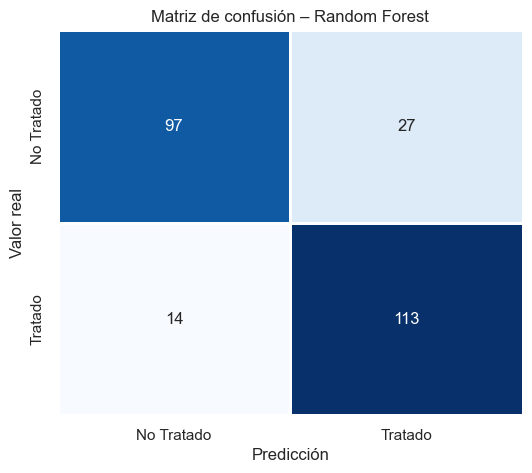

In [18]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Métricas
acc_rf = accuracy_score(y_test_raw, y_pred_rf)
prec_rf = precision_score(y_test_raw, y_pred_rf)
rec_rf = recall_score(y_test_raw, y_pred_rf)
f1_rf = f1_score(y_test_raw, y_pred_rf)

# Mostrar resultados
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")

# Matriz de confusión bonita
cm = confusion_matrix(y_test_raw, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")
plt.title("Matriz de confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()


In [19]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros del modelo:")
for param, value in grid_rf.best_params_.items():
    print(f" - {param}: {value}")

Mejores hiperparámetros del modelo:
 - bootstrap: True
 - max_depth: None
 - max_features: log2
 - min_samples_leaf: 1
 - min_samples_split: 5
 - n_estimators: 100


In [20]:
# Instanciamos el modelo
rf = RandomForestClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    "n_estimators": [80, 100, 120, 150],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [3, 5, 7],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["log2", "sqrt", None],
    "bootstrap": [True, False]  # Mantenemos el valor que mejor funcionó
}

# Grid Search con validación cruzada
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

# Entrenamos
grid_rf.fit(X_train_raw, y_train_raw)

# Guardamos el mejor modelo
best_rf = grid_rf.best_estimator_

# Predecimos
y_pred_rf = best_rf.predict(X_test_raw)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


Accuracy:  0.8367
Precision: 0.8071
Recall:    0.8898
F1 Score:  0.8464


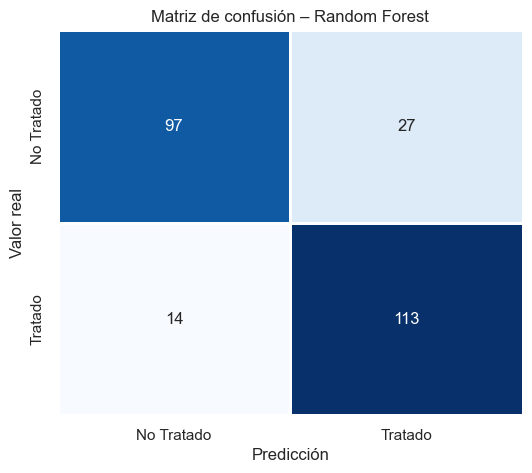

In [21]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Métricas
acc_rf = accuracy_score(y_test_raw, y_pred_rf)
prec_rf = precision_score(y_test_raw, y_pred_rf)
rec_rf = recall_score(y_test_raw, y_pred_rf)
f1_rf = f1_score(y_test_raw, y_pred_rf)

# Mostrar resultados
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")

# Matriz de confusión bonita
cm = confusion_matrix(y_test_raw, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")
plt.title("Matriz de confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

In [22]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros del modelo:")
for param, value in grid_rf.best_params_.items():
    print(f" - {param}: {value}")

Mejores hiperparámetros del modelo:
 - bootstrap: True
 - max_depth: None
 - max_features: log2
 - min_samples_leaf: 1
 - min_samples_split: 5
 - n_estimators: 100


In [23]:
# Instanciamos el modelo
rf = RandomForestClassifier(random_state=42)

# Definimos el grid de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 150, 200, 300],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 7, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# Grid Search con validación cruzada
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

# Entrenamos
grid_rf.fit(X_train_raw, y_train_raw)

# Guardamos el mejor modelo
best_rf = grid_rf.best_estimator_

# Predecimos
y_pred_rf = best_rf.predict(X_test_raw)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


Accuracy:  0.8367
Precision: 0.8071
Recall:    0.8898
F1 Score:  0.8464


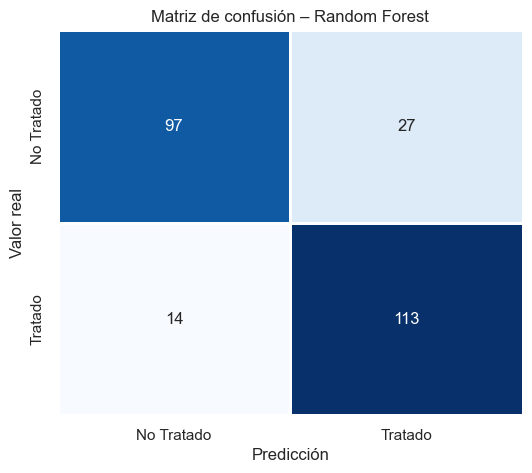

In [24]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Métricas
acc_rf = accuracy_score(y_test_raw, y_pred_rf)
prec_rf = precision_score(y_test_raw, y_pred_rf)
rec_rf = recall_score(y_test_raw, y_pred_rf)
f1_rf = f1_score(y_test_raw, y_pred_rf)

# Mostrar resultados
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")

# Matriz de confusión bonita
cm = confusion_matrix(y_test_raw, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")
plt.title("Matriz de confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

In [25]:
# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros del modelo:")
for param, value in grid_rf.best_params_.items():
    print(f" - {param}: {value}")

Mejores hiperparámetros del modelo:
 - bootstrap: True
 - max_depth: None
 - max_features: log2
 - min_samples_leaf: 1
 - min_samples_split: 5
 - n_estimators: 100


No varia en ningun grid search, nos quedamos con esos hiperparametros